First 5 rows of the dataset:
   Ratio of Nitrogen  Ratio of Phosphorous  Ratio of Potassium  Temperature  \
0                 90                    42                  43    20.879744   
1                 85                    58                  41    21.770462   
2                 60                    55                  44    23.004459   
3                 74                    35                  40    26.491096   
4                 71                    54                  16    22.613600   

    Humidity  ph Value    Rainfall  Label  
0  82.002744  6.502985  202.935536   rice  
1  80.319644  7.038096  226.655537   rice  
2  82.320763  7.840207  263.964248   rice  
3  80.158363  6.980401  242.864034   rice  
4  63.690706  5.749914   87.759539  maize  

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   R

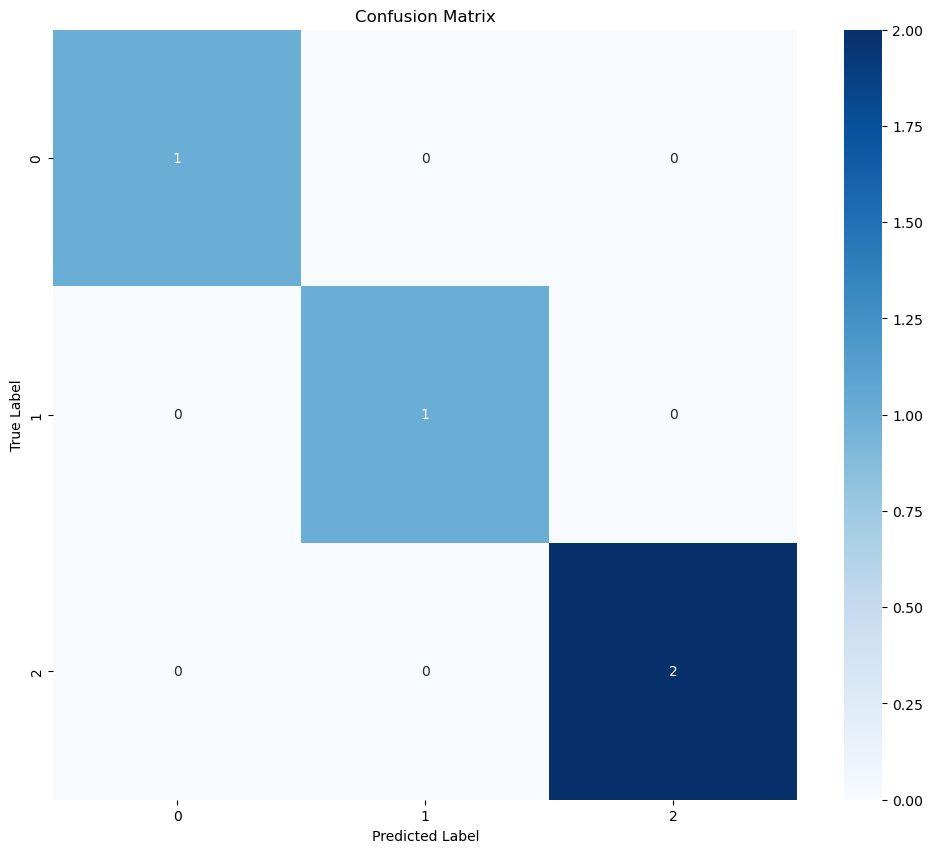

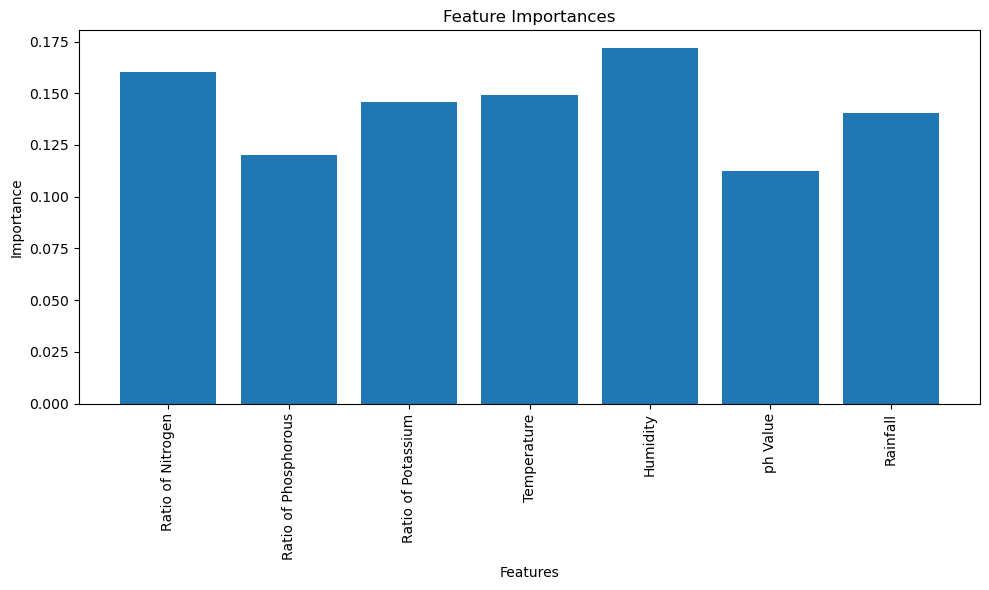


Prediction for new data: rice


In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the Dataset
data = pd.read_csv('Crop Recommendation Dataset.csv')

# 2. Data Exploration and Preprocessing
print("First 5 rows of the dataset:")
print(data.head())

print("\nDataset information:")
print(data.info())

print("\nSummary statistics of the dataset:")
print(data.describe())

print("\nClass distribution:")
print(data['Label'].value_counts())

# Check for missing values
print("\nMissing values:")
print(data.isnull().sum())

# Separate features (X) and target variable (y)
X = data.drop('Label', axis=1)
y = data['Label']

# 3. Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nShape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

# 4. Train the Random Forest Model
# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)  # You can experiment with different values of n_estimators

# Train the model
rf_classifier.fit(X_train, y_train)

# 5. Make Predictions
y_pred = rf_classifier.predict(X_test)

# 6. Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# 7. Visualize the Confusion Matrix (Optional)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 8. Feature Importance (Optional)
feature_importances = rf_classifier.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 6))
plt.bar(feature_names, feature_importances)
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importances")
plt.tight_layout()
plt.show()


# 9. Make Predictions on New Data (Optional)
# Example:
new_data = pd.DataFrame({
    'Ratio of Nitrogen': [90],
    'Ratio of Phosphorous': [40],
    'Ratio of Potassium': [40],
    'Temperature': [22],
    'Humidity': [80],
    'ph Value': [6],
    'Rainfall': [200]
})

prediction = rf_classifier.predict(new_data)
print("\nPrediction for new data:", prediction[0])
